In [6]:
import gym
import matplotlib.pyplot as plt
from gym_minigrid.wrappers import * 		# pip install gym-minigrid

%matplotlib inline

# gym-MiniGrid Environment: Basics
Let's learn about how the environment is structured. Overall, it follows the conventions of a typical `gym` environment.

In [35]:
env = gym.make('MiniGrid-FourRooms-v0')
obs = env.reset()

## Observation Space

In [23]:
print(obs.keys())
print(obs['image'].shape)
print(obs['direction'])
print(obs['mission'])

dict_keys(['image', 'direction', 'mission'])
(7, 7, 3)
2
Reach the goal


Text representation of the environment is also available:

In [28]:
print(env)

WGWGWGWGWGWGWGWGWGWGWGWGWGWGWGWGWGWGWG
WG                WG                WG
WG                WG            GG  WG
WG                WG                WG
WG                                  WG
WG                WG                WG
WG                WG                WG
WG                WG                WG
WG<<              WG                WG
WGWGWG  WGWGWGWGWGWGWGWGWGWGWGWG  WGWG
WG                WG                WG
WG                WG                WG
WG                WG                WG
WG                WG                WG
WG                                  WG
WG                WG                WG
WG                WG                WG
WG                WG                WG
WGWGWGWGWGWGWGWGWGWGWGWGWGWGWGWGWGWGWG


Each tile is encoded as a 3 dimensional tuple: (OBJECT_IDX, COLOR_IDX, STATE).

OBJECT_TO_IDX and COLOR_TO_IDX mapping can be found in `gym_minigrid/minigrid.py`.

    e.g. door STATE -> 0: open, 1: closed, 2: locked


In [40]:
print(obs['image'])


[[[2 5 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[2 5 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [8 1 0]
  [1 0 0]
  [1 0 0]]

 [[2 5 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[2 5 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


## Action Space

In [24]:
env.action_space.n

7

Actions in the basic environment:

- Turn left
- Turn right
- Move forward
- Pick up an object
- Drop the object being carried
- Toggle (open doors, interact with objects)
- Done (task completed, optional)

Let's randomly sample actions and see what happens.

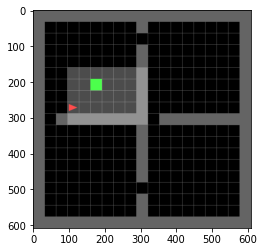

In [38]:
from IPython import display

done = False
obs = env.reset()

while not done:
    action = env.action_space.sample()
    obs, reward, done, info = env.step(action)
    img = env.render('rgb_array')
    plt.imshow(img)
    display.display(plt.gcf())
    display.clear_output(wait=True)

# Setting Up Q-Learning
Let's set up some class objects for doing Q-Learning in this environment. 